In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import pickle

In [3]:
data=pd.read_csv("../data/math_quiz_dataset.csv")

In [4]:
data.head()

,difficulty,response_time,correct,streak,next_level,confidence
0,1,3.55,1,12,1,74.2
1,1,2.81,1,14,1,84.1
2,1,2.42,1,15,1,84.6
3,2,8.26,1,17,2,72.0
4,1,4.63,1,14,1,90.8


In [5]:
data.head()

,difficulty,response_time,correct,streak,next_level,confidence
0,1,3.55,1,12,1,74.2
1,1,2.81,1,14,1,84.1
2,1,2.42,1,15,1,84.6
3,2,8.26,1,17,2,72.0
4,1,4.63,1,14,1,90.8


In [6]:
X = data[["difficulty", "response_time", "correct", "streak","confidence"]]
y = data["next_level"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [9]:
y_pred=model.predict(X_test)
y_pred

array([1, 2, 2, 1, 1, 1, 2, 2, 1, 3, 2, 1, 1, 3, 1, 1, 2, 2, 2, 3, 1, 3,
       3, 3, 1, 3, 1, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 1, 3, 1, 3, 1, 2, 2,
       1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 2, 2, 3, 2, 1, 2, 3, 2, 2, 1, 2, 1,
       1, 3, 2, 3, 3, 2, 3, 2, 2, 1, 1, 1, 3, 1, 3, 2, 3, 2, 1, 3, 2, 3,
       1, 1, 1, 3, 3, 2, 2, 1, 1, 3, 3, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 1, 3, 3, 2, 1, 1, 2, 2, 1, 3,
       2, 3, 3, 1, 3, 2, 2, 2, 1, 3, 3, 3, 1, 3, 3, 1, 3, 2, 1, 2, 1, 3,
       2, 2, 3, 2, 3, 3, 1, 3, 1, 3, 3, 3, 1, 2, 2, 1, 2, 2, 2, 3, 1, 1,
       3, 3, 2, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 2, 3, 1, 3, 1, 1, 2, 2, 3,
       3, 2], dtype=int64)

In [10]:
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.92      0.91        65
           2       0.81      0.78      0.79        69
           3       0.88      0.88      0.88        66

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [11]:
# !pip install matplotlib seaborn

Text(0.5, 1.0, 'Feature Importances')

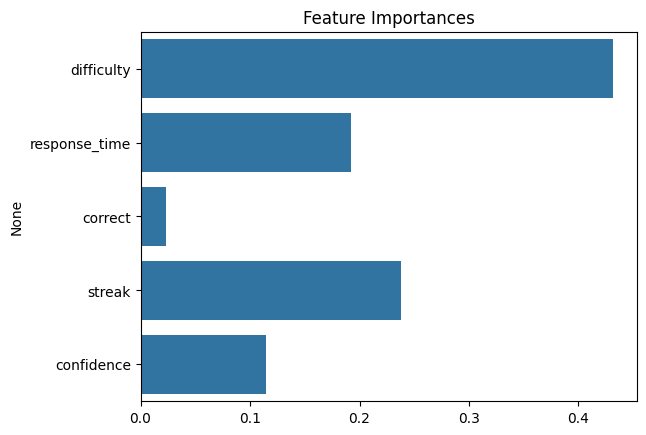

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_importances = model.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances")


<Axes: >

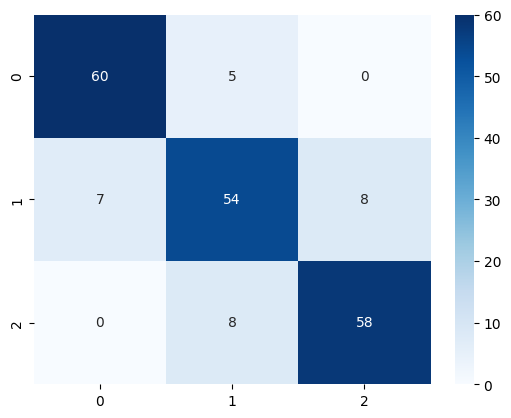

In [13]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, fmt='d', cmap='Blues')

In [14]:

with open("../artifacts/level_recommender_model.pkl", "wb") as f:
    pickle.dump(model, f)
    
    

In [15]:
model_loaded = pickle.load(open("../artifacts/level_recommender_model.pkl", "rb"))
def recommend_next_level(difficulty, correct, response_time, streak,confidence):
    input_data = pd.DataFrame([{
        "difficulty": difficulty,
        "response_time": response_time,
        "correct": correct,
        "streak": streak,
        "confidence": confidence
    }])
    predicted_level = model_loaded.predict(input_data)[0]
    return predicted_level


In [16]:
data.head()

,difficulty,response_time,correct,streak,next_level,confidence
0,1,3.55,1,12,1,74.2
1,1,2.81,1,14,1,84.1
2,1,2.42,1,15,1,84.6
3,2,8.26,1,17,2,72.0
4,1,4.63,1,14,1,90.8


In [17]:
test_value=recommend_next_level(2,1,4.5,2,87.8)  
print(test_value) 

2


<!-- Optimizing and Generalizing the model -->

In [18]:
model=RandomForestClassifier()

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [15,20,50],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [10,15,20] 
}

In [20]:
gridsearchcv=GridSearchCV(estimator=model, param_grid=param_grid, cv=8, n_jobs=1, verbose=2)
gridsearchcv.fit(X_train, y_train)  
gridsearchcv.best_params_

Fitting 8 folds for each of 36 candidates, totalling 288 fits
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.1s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END .max_depth=5, min_samples_split=10, n_

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

In [21]:
model=RandomForestClassifier(min_samples_split=10,n_estimators=50,max_depth=30)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

In [22]:
with open("../artifacts/level_recommender_model.pkl", "wb") as f:
    pickle.dump(model, f)
    

In [23]:
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.92      0.92        65
           2       0.82      0.84      0.83        69
           3       0.92      0.88      0.90        66

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



<Axes: >

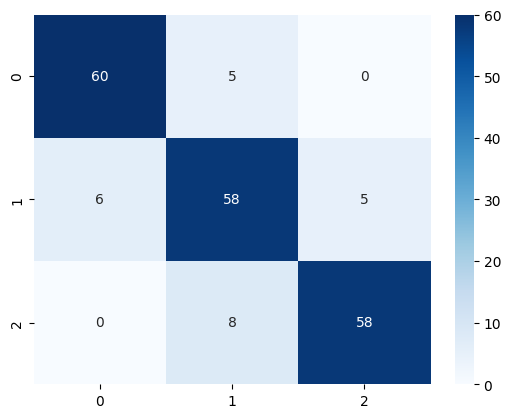

In [24]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, fmt='d', cmap='Blues')